In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [6]:
class CPG:
    def __init__(self, num_neurons, layers, coupling_strength):
        self.num_neurons = num_neurons
        self.layers=layers
        self.coupling_strength = coupling_strength
        self.phase_offset = np.random.uniform(-np.pi, np.pi, size=num_neurons)
        self.frequency = np.random.uniform(0.5, 2.0, size=num_neurons)
        #self.amplitude = np.random.uniform(0.5, 2.0, size=num_neurons)
        self.bias = np.random.uniform(-1.0, 1.0, size=num_neurons)
        self.phase = np.zeros((num_neurons,layers))
        self.output = np.zeros((num_neurons,layers))
        self.weights = np.random.uniform(-1.0, 1.0, size=(num_neurons, num_neurons))
        self.num_genes = (self.weights.flatten().shape[0]+
                          self.bias.flatten().shape[0]+
                          self.frequency.flatten().shape[0])
    def step(self, inputs, dt):
        inputs=inputs.reshape(self.num_neurons,1)
        # Calculate the coupling between neurons using the evolved weights
        coupling = self.coupling_strength * np.dot(self.output.T,self.weights)
        
        # Update the phase of each neuron
        self.phase += np.add((2 * np.pi * self.frequency * dt).reshape(self.num_neurons,1),
                                coupling.reshape(self.num_neurons,self.layers))
        # Calculate the output of each neuron
        self.output = np.sin(self.phase ) + self.bias.reshape(self.num_neurons,1)
        
        # Add inputs from sensors to the output
        self.output = np.add(self.output ,inputs)
    def reset(self):
        self.phase = np.zeros((self.num_neurons,self.layers))
        self.output = np.zeros((self.num_neurons,self.layers))
    def set_genes(self,genotype):
        self.weights=genotype[0:self.weights.flatten().shape[0]].reshape(self.num_neurons,self.num_neurons)
        self.bias=genotype[self.weights.flatten().shape[0]:self.weights.flatten().shape[0]+self.bias.flatten().shape[0]]
        self.frequency=genotype[self.weights.flatten().shape[0]+self.bias.flatten().shape[0]:]
    def forward(self,inputs,dt):
        self.step(inputs,dt)
        instruct=np.tanh(self.output)
        instruct[instruct<0]=-1
        instruct[instruct>=0]=1
        return instruct

In [4]:
cpg=CPG(6,2,2)
inputs=np.random.normal(0,2,(6,))
genotype=np.random.normal(0,3,(cpg.num_genes))
cpg.set_genes(genotype)

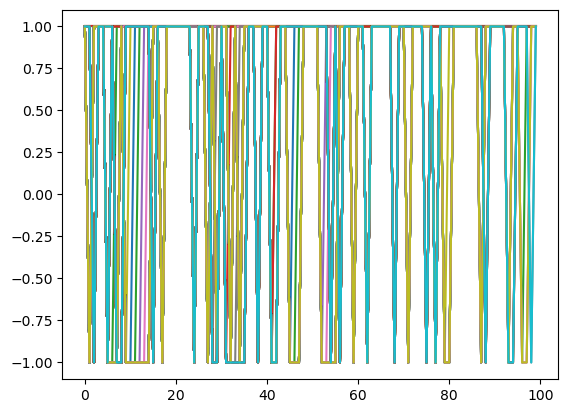

In [29]:

a=np.ones((100,6,2))
for i in range(100):
    cpg.step(inputs,0.01)
    instruct=np.tanh(cpg.output)
    instruct[instruct<0]=-1
    instruct[instruct>=0]=1
    a[i]=instruct
    #plt.imshow(instruct.reshape(5,1))
    clear_output()
    plt.cla
    plt.plot(np.squeeze(a)[:,0])
    #plt.pause(0.05)

plt.show()

(2, 6, 100)


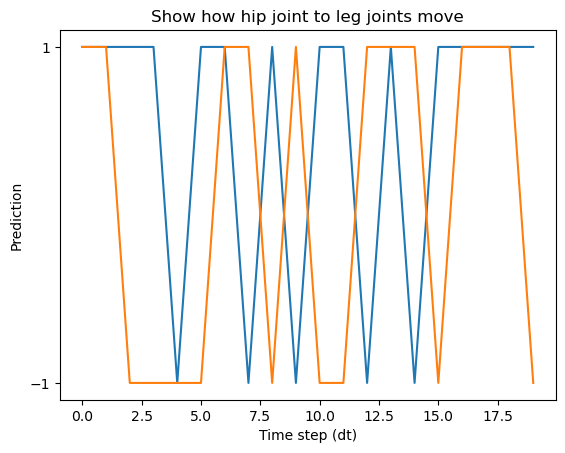

In [45]:
print(a.T.shape)
plt.plot(np.squeeze(a.T)[0][0][20:40])
plt.plot(np.squeeze(a.T)[1][1][20:40])
plt.yticks([-1, 1])
plt.xlabel("Time step (dt)")
plt.ylabel("Prediction")
plt.title("Show how hip joint to leg joints move")
plt.show()

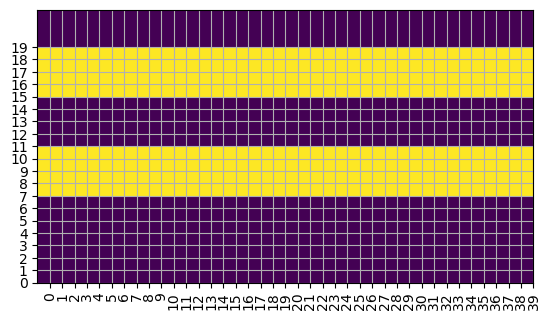

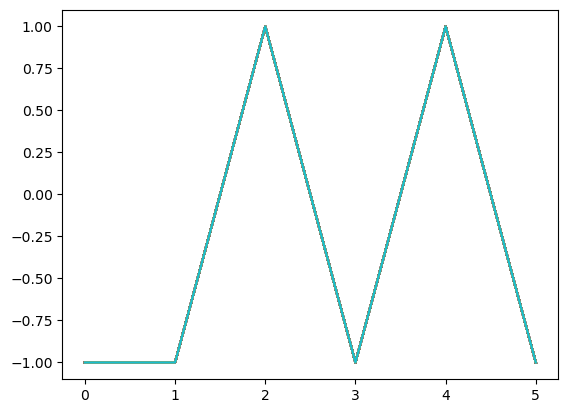

In [63]:
cpg=CPG(6,2,2)
inputs=np.random.normal(0,5,(6,))
genotype=np.load("/its/home/drs25/Documents/RL_and_Evolve/Simwork/Krab/model_cpg_noRendA.npy")

cpg.set_genes(genotype[11])


SIZE=100
a=np.ones((SIZE,6,2))
image=np.zeros((SIZE,12))
#cpg.set_genes(genotype+np.random.normal(0,6,(cpg.num_genes)))
for i in range(SIZE):
    cpg.step(inputs,0.01)
    instruct=np.tanh(cpg.output)
    instruct[instruct<0]=-1
    instruct[instruct>=0]=1
    a[i]=instruct
    #plt.imshow(instruct.reshape(12,1))
    #plt.pause(0.05)
    clear_output()
    image[i]=instruct.reshape(12,)

CUT=40
buffer=20
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(image[CUT:CUT+buffer].T)
plt.yticks([i/2 for i in range(buffer)],[i for i in range(buffer)])
plt.xticks([i/2 for i in range(buffer*2)],[i for i in range(buffer*2)],rotation=90)
plt.ylim([0,11])
plt.grid()
plt.show()

plt.plot(np.squeeze(a.T[0]))

plt.show()